In [47]:
!pip install prophet

In [228]:
# Run 1st

import pandas as pd
import requests
import json
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [229]:
# Run 2nd
ticker_list = ['PANDY']  # Example list of tickers

pandora_necklace_df = pd.read_csv('pandora resources/pandora_necklace_search.csv', skiprows=1, header=None, names=['Month', 'Pandora Necklace'])
pandora_rings_df = pd.read_csv('pandora resources/pandora_rings_search.csv', skiprows=1, header=None, names=['Month', 'Pandora Ring'])
pandora_bracelet_df = pd.read_csv('pandora resources/pandora_bracelet_search.csv', skiprows=1, header= None, names=['Month', 'Pandora Bracelet'])
pandora_charms_df = pd.read_csv('pandora resources/pandora_charms_search.csv', skiprows=1, header= None, names=['Month', 'Pandora Charms'])

# add them all to a list
df_list_of_dfs = list_of_dfs


In [230]:
# Run 3rd 
# Clean the dataframes

import pandas as pd

def clean_dataframes(dfs_list):
    for df in dfs_list:
        df.drop(0, inplace=True)

# Assuming pandora_necklace_df, pandora_rings_df, pandora_bracelet_df, and pandora_charms_df are Pandas DataFrames
list_of_dfs = [pandora_necklace_df, pandora_rings_df, pandora_bracelet_df, pandora_charms_df]

# Call the function to clean the DataFrames in the list
clean_dataframes(list_of_dfs)

# Display the cleaned DataFrames
for df in list_of_dfs:
    print(df)


##def clean_dataframes(dfs_list):
    ##for df in dfs_list:
        ##df.drop(0, inplace=True)

##clean_dataframes(list_of_dfs)

# Display the dataframes

##for df in list_of_dfs:
    ##print(df)

#running_shorts_df['Month'].dtype, tennis_skirt_df['Month'].dtype, lulu_lemon_df['Month'].dtype 

       Month Pandora Necklace
1    2014-01                0
2    2014-02                0
3    2014-03                0
4    2014-04                0
5    2014-05                0
..       ...              ...
116  2023-08                6
117  2023-09                8
118  2023-10               30
119  2023-11               56
120  2023-12              100

[120 rows x 2 columns]
       Month Pandora Ring
1    2014-01            5
2    2014-02            6
3    2014-03            4
4    2014-04            4
5    2014-05            4
..       ...          ...
116  2023-08           14
117  2023-09           15
118  2023-10           19
119  2023-11           27
120  2023-12           35

[120 rows x 2 columns]
       Month Pandora Bracelet
1    2014-01               26
2    2014-02               45
3    2014-03               31
4    2014-04               22
5    2014-05               38
..       ...              ...
116  2023-08               22
117  2023-09               27
118  2023-

In [231]:
# RUN 4th

def merge_and_plot_dfs(df_list, merge_on='Month', plot=True):
    # Merge all dataframes on the specified column
    merged_df = df_list[0]
    for df in df_list[1:]:
        merged_df = pd.merge(merged_df, df, on=merge_on)

    # Convert relevant columns to numeric, handling non-numeric values
    for col in merged_df.columns:
        if col != merge_on:
            merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

    # Calculate the average
    cols_to_average = [col for col in merged_df.columns if col != merge_on]
    merged_df['Average of Search Terms'] = merged_df[cols_to_average].mean(axis=1)

    return merged_df

merged_df = merge_and_plot_dfs(list_of_dfs)

merged_df

##df1 = running_shorts_df 
##df2 = tennis_skirt_df
##df3 = lulu_lemon_df  

# Merge or concatenate dataframes based on the date
##merged_df = pd.merge(df1, df2, on='Month').merge(df3, on='Month')

##merged_df['Running Shorts'] = pd.to_numeric(merged_df['Running Shorts'], errors='coerce')
##merged_df['Tennis Skirts'] = pd.to_numeric(merged_df['Tennis Skirts'], errors='coerce')
##merged_df['lululemon Sales'] = pd.to_numeric(merged_df['lululemon Sales'], errors='coerce')

# Convert 'Date' column to datetime
##merged_df['Month'] = pd.to_datetime(merged_df['Month']).dt.date
##merged_df['Y4'] = ((merged_df['Running Shorts'] + merged_df['Tennis Skirts'] + merged_df['lululemon Sales']) / 3).astype(int)

# Plot the data
##plt.figure(figsize=(10, 6))

# plt.plot(merged_df['Month'], merged_df['Running Shorts'], label='Y1')
# plt.plot(merged_df['Month'], merged_df['Tennis Skirts'], label='Y2')
# plt.plot(merged_df['Month'], merged_df['lululemon Sales'], label='Y3')
# df_home_sales[["inventory", "homes_sold"]].corr()

# Plot the average
##plt.plot(merged_df['Month'], merged_df['Y4'], label='Y4')

##plt.xlabel('Month')
##plt.ylabel('Y Values')
##plt.title('Combined Dataframes')
##merged_df.head()
##plt.legend()
##plt.show()

,Month,Pandora Necklace,Pandora Ring,Pandora Bracelet,Pandora Charms,Average of Search Terms
0,2014-01,0.0,5,26,26,14.25
1,2014-02,0.0,6,45,35,21.50
2,2014-03,0.0,4,31,26,15.25
3,2014-04,0.0,4,22,25,12.75
4,2014-05,0.0,4,38,40,20.50
...,...,...,...,...,...,...
115,2023-08,6.0,14,22,12,13.50
116,2023-09,8.0,15,27,13,15.75
117,2023-10,30.0,19,27,12,22.00
118,2023-11,56.0,27,98,23,51.00


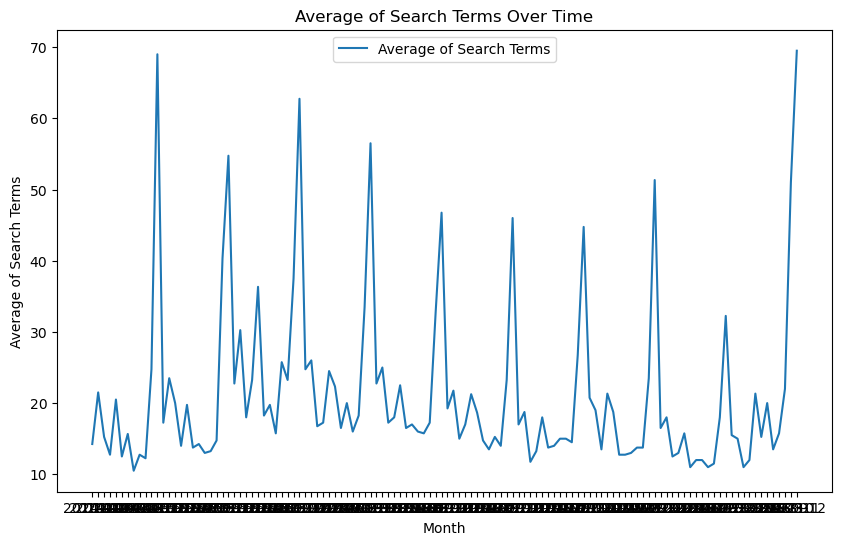

In [232]:
# Plot that

plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.plot(merged_df['Month'], merged_df['Average of Search Terms'], label='Average of Search Terms')

# Setting labels and title
plt.xlabel('Month')
plt.ylabel('Average of Search Terms')
plt.title('Average of Search Terms Over Time')

# Optionally, you can format the x-axis to show dates more clearly

# Adding a legend if necessary
plt.legend()

# Show the plot
plt.show()

In [233]:
# Run 5th

stock_and_google_trends_df = merged_df
merged_df = merged_df[['Month', 'Average of Search Terms']]
merged_df
#stock_and_google_trends_df = merged_df
#merged_df

,Month,Average of Search Terms
0,2014-01,14.25
1,2014-02,21.50
2,2014-03,15.25
3,2014-04,12.75
4,2014-05,20.50
...,...,...
115,2023-08,13.50
116,2023-09,15.75
117,2023-10,22.00
118,2023-11,51.00


In [234]:
# 5.5

avg_searchterm_prophet_df = merged_df
avg_searchterm_prophet_df

,Month,Average of Search Terms
0,2014-01,14.25
1,2014-02,21.50
2,2014-03,15.25
3,2014-04,12.75
4,2014-05,20.50
...,...,...
115,2023-08,13.50
116,2023-09,15.75
117,2023-10,22.00
118,2023-11,51.00


In [235]:
# Run 6th

import yfinance as yf
import pandas as pd

def get_stock_data(ticker_symbols, start_date='2014-01-01', end_date='2023-01-01'):
    stock_dfs = []

    for ticker_symbol in ticker_symbols:
        # Fetch stock data
        ticker = yf.Ticker(ticker_symbol)
        hist = ticker.history(start=start_date, end=end_date, interval="1mo")

        # Convert to DataFrame and process
        df = pd.DataFrame(hist).reset_index().rename(columns={'Date': 'Month'})

        # Convert 'Month' to datetime format (if not already)
        df['Month'] = pd.to_datetime(df['Month'])

        # Convert 'Month' to period (year-month format) and then to string (object)
        df['Month'] = df['Month'].dt.to_period('M').astype(str)

        # Create a new DataFrame with 'Month' and 'Close'
        close = f'Close {ticker_symbol}'
        stock_df = df[['Month', 'Close']]
        stock_df = stock_df.rename(columns={'Close': close})
        stock_dfs.append(stock_df)

    return stock_dfs
# Your existing code to get the stock data
##ticker_symbol = 'PANDY'
##start_date = '2014-01-01'
##end_date = '2023-08-01'
##ticker = yf.Ticker(ticker_symbol)
##hist = ticker.history(start=start_date, end=end_date, interval="1mo")
##df = pd.DataFrame(hist).reset_index().rename(columns={'Date': 'Month'})

# Convert 'Month' to datetime format (if not already)
##df['Month'] = pd.to_datetime(df['Month'])

# Convert 'Month' to period (year-month format) and then to string (object)
##df['Month'] = df['Month'].dt.to_period('M').astype(str)

# Create a new DataFrame with 'Month' and 'Close'
##stock_df = df[['Month', 'Close']]
##stock_df['Month'].dtype


In [236]:
# Usage

list_of_stock_dfs = get_stock_data(ticker_list)

list_of_stock_dfs

C:\Users\Jasmi\AppData\Local\Temp\ipykernel_29924\3875744109.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Month'].dt.to_period('M').astype(str)


[       Month  Close PANDY
 0    2014-01    10.426917
 1    2014-02    12.607424
 2    2014-03    12.139128
 3    2014-04    12.575893
 4    2014-05    13.760471
 ..       ...          ...
 103  2022-08    14.674754
 104  2022-09    11.422354
 105  2022-10    12.853800
 106  2022-11    18.277714
 107  2022-12    17.148138
 
 [108 rows x 2 columns]]

In [237]:
filterd_list_stocks[0].dtypes

Month                                object
Close PANDY                         float64
Average of Search Terms             float64
Close PANDY % Change                float64
Average of Search Terms % Change    float64
dtype: object

In [238]:
###############################

def remove_open(list_of_stocks):
    list_out = []
    
    for df in list_of_stocks:
        # Select all columns except 'Open'
        columns_except_open = [col for col in df.columns if col != 'Open']
        # Create a new dataframe with the selected columns
        df_filtered = df[columns_except_open]
        list_out.append(df_filtered)
                
    return list_out



for df in list_of_stock_dfs:
    df.dropna(inplace=True)
    df['Month'] = df['Month'].astype(str)
    


filterd_list_stocks = remove_open(list_of_stock_dfs)                
                
merged_stocks = merge_and_plot_dfs(filterd_list_stocks)

merge_on = 'Month'
columns_to_convert = [col for col in merged_stocks.columns if col != merge_on]

# Apply percent change to each column and multiply by 100 for percentage
for col in columns_to_convert:
    merged_stocks[f'{col} % Change'] = merged_stocks[col].pct_change() * 100

    
columns_to_keep = [merge_on] + [col for col in merged_stocks.columns if '% Change' in col 
                                and col != 'Average of Search Terms % Change']

# Filter the DataFrame to keep only the desired columns
merged_stocks = merged_stocks[columns_to_keep]

cols_to_average = [col for col in merged_stocks.columns if col != merge_on]

merged_stocks['Average of Stocks % chng'] = merged_stocks[cols_to_average].mean(axis=1)
 
merged_stocks = merged_stocks[['Month', 'Average of Stocks % chng']]
merged_stocks.dropna()

C:\Users\Jasmi\AppData\Local\Temp\ipykernel_29924\1760243821.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_stocks['Average of Stocks % chng'] = merged_stocks[cols_to_average].mean(axis=1)


,Month,Average of Stocks % chng
1,2014-02,20.912286
2,2014-03,-3.714447
3,2014-04,3.597999
4,2014-05,9.419434
5,2014-06,3.519229
...,...,...
103,2022-08,-18.803881
104,2022-09,-22.163236
105,2022-10,12.531971
106,2022-11,42.196969


In [239]:
# Run 7th
stock_and_google_trends_df = pd.merge(merged_df, merged_stocks, on='Month')
stock_and_google_trends_df

,Month,Average of Search Terms,Average of Stocks % chng
0,2014-01,14.25,NaN
1,2014-02,21.50,20.912286
2,2014-03,15.25,-3.714447
3,2014-04,12.75,3.597999
4,2014-05,20.50,9.419434
...,...,...,...
103,2022-08,12.00,-18.803881
104,2022-09,11.00,-22.163236
105,2022-10,11.50,12.531971
106,2022-11,18.00,42.196969


In [240]:
# Run 8th

# Calculate percentage change for 'Stock Price'
#stock_and_google_trends_df['Stock Price % Change'] = stock_and_google_trends_df['Close'].pct_change() * 100

# Calculate percentage change for 'Y4'
stock_and_google_trends_df['Average Search Term % Change'] = stock_and_google_trends_df['Average of Search Terms'].pct_change() * 100
stock_and_google_trends_df.dropna()

,Month,Average of Search Terms,Average of Stocks % chng,Average Search Term % Change
1,2014-02,21.50,20.912286,50.877193
2,2014-03,15.25,-3.714447,-29.069767
3,2014-04,12.75,3.597999,-16.393443
4,2014-05,20.50,9.419434,60.784314
5,2014-06,12.50,3.519229,-39.024390
...,...,...,...,...
103,2022-08,12.00,-18.803881,0.000000
104,2022-09,11.00,-22.163236,-8.333333
105,2022-10,11.50,12.531971,4.545455
106,2022-11,18.00,42.196969,56.521739


In [241]:
#Run 8.5

stock_and_google_trends_df2 = stock_and_google_trends_df[
    stock_and_google_trends_df['Average of Search Terms'] > 50]

new_df = stock_and_google_trends_df2.copy()

# If the 'Month' column contains strings in the 'YYYY-MM' format
new_df['Month'] = new_df['Month'].str[-2:]

frequency = new_df['Month'].value_counts()
frequency

Month
12    5
Name: count, dtype: int64

In [242]:
stock_and_google_trends_df2

,Month,Average of Search Terms,Average of Stocks % chng,Average Search Term % Change
11,2014-12,69.000000,-8.043347,178.787879
23,2015-12,54.750000,5.973670,35.743802
35,2016-12,62.750000,9.895322,67.333333
47,2017-12,56.500000,10.272680,68.656716
95,2021-12,51.333333,1.569236,118.439716


In [243]:
# Run 9th

stock_and_google_trends_df2[['Average Search Term % Change', "Average of Stocks % chng"]].corr()

,Average Search Term % Change,Average of Stocks % chng
Average Search Term % Change,1.000000,-0.892493
Average of Stocks % chng,-0.892493,1.000000


<Axes: >

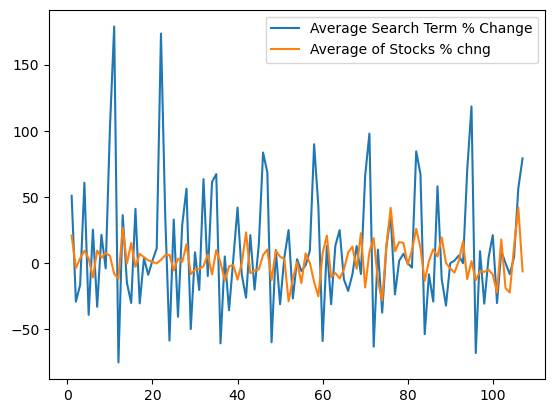

In [244]:
# Run 10th
stock_and_google_trends_df[['Average Search Term % Change', "Average of Stocks % chng"]].plot()

In [245]:
## Prophet Modeling next

In [ ]:
## Next to do: Build ffunction that converts dfs to prophet dfs

In [264]:
# Prophet looping
from prophet import Prophet
import matplotlib.pyplot as plt

# Model for dfs that go > 100
def logistic_forecast(df):
    # Ensure correct column names
    df.columns = ['ds', 'y']
    df['cap'] = 100
    df['floor'] = 0

    model = Prophet(growth='logistic')
    model.fit(df)

    # Make future dataframe and predict
    future = model.make_future_dataframe(periods=60, freq='M')
    future['cap'] = 100
    future['floor'] = 0
    forecast = model.predict(future)

    # Create and save the plot
    fig = model.plot(forecast)
    plt.close(fig)  # Close the plot to prevent it from displaying immediately

    return {'dataframe': forecast, 'plot': fig}


# Main Function

def df_forecast(df_list):
    results = {}  # Dictionary to store forecasts and plots

    for i, df in enumerate(df_list, start=1):
        # Ensure correct column names
        df.columns = ['ds', 'y']

        # Fit the Prophet model
        m = Prophet()
        m.fit(df)

        # Make future dataframe and predict
        future = m.make_future_dataframe(periods=60, freq='M')
        forecast = m.predict(future)

        # Check if any yhat values are above 100
        if forecast['yhat'].max() > 100:
            # Call logistic forecast function
            result = logistic_forecast(df)
        else:
            # Create and save the plot for non-logistic forecast
            fig = m.plot(forecast)
            plt.close(fig)  # Close the plot to prevent it from displaying immediately
            result = {'dataframe': forecast, 'plot': fig}

        # Store forecast and plot in the dictionary
        results[f'forecast{i}'] = result

    return results

In [265]:
dfs = list_of_dfs 

all_results = df_forecast(dfs)

ValueError: Unable to parse string "<1" at position 6

In [249]:
from IPython.display import display

for key, result in all_results.items():
    print(key) 
    # Display the forecast DataFrame
    display(result['dataframe'])
    # Display the plot
    fig = result['plot']
    display(fig)

21:56:03 - cmdstanpy - INFO - Chain [1] start processing
21:56:05 - cmdstanpy - INFO - Chain [1] done processing


forecast1


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,21.365412,13.938814,25.441121,21.365412,21.365412,-1.575981,-1.575981,-1.575981,-1.575981,-1.575981,-1.575981,0.0,0.0,0.0,19.789431
1,2014-02-01,21.426696,15.587870,28.627240,21.426696,21.426696,0.746751,0.746751,0.746751,0.746751,0.746751,0.746751,0.0,0.0,0.0,22.173446
2,2014-03-01,21.482049,9.502695,21.853519,21.482049,21.482049,-5.792291,-5.792291,-5.792291,-5.792291,-5.792291,-5.792291,0.0,0.0,0.0,15.689758
3,2014-04-01,21.543333,10.309994,22.116062,21.543333,21.543333,-4.973699,-4.973699,-4.973699,-4.973699,-4.973699,-4.973699,0.0,0.0,0.0,16.569634
4,2014-05-01,21.602640,16.203123,28.402132,21.602640,21.602640,0.669820,0.669820,0.669820,0.669820,0.669820,0.669820,0.0,0.0,0.0,22.272461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2028-07-31,16.643086,3.018185,15.940308,15.576385,17.752021,-7.308823,-7.308823,-7.308823,-7.308823,-7.308823,-7.308823,0.0,0.0,0.0,9.334263
176,2028-08-31,16.608146,2.695757,15.401788,15.509092,17.740430,-7.602988,-7.602988,-7.602988,-7.602988,-7.602988,-7.602988,0.0,0.0,0.0,9.005159
177,2028-09-30,16.574334,4.828057,17.644004,15.450534,17.728515,-5.490479,-5.490479,-5.490479,-5.490479,-5.490479,-5.490479,0.0,0.0,0.0,11.083855
178,2028-10-31,16.539394,22.942042,35.955718,15.386306,17.717230,12.968305,12.968305,12.968305,12.968305,12.968305,12.968305,0.0,0.0,0.0,29.507699


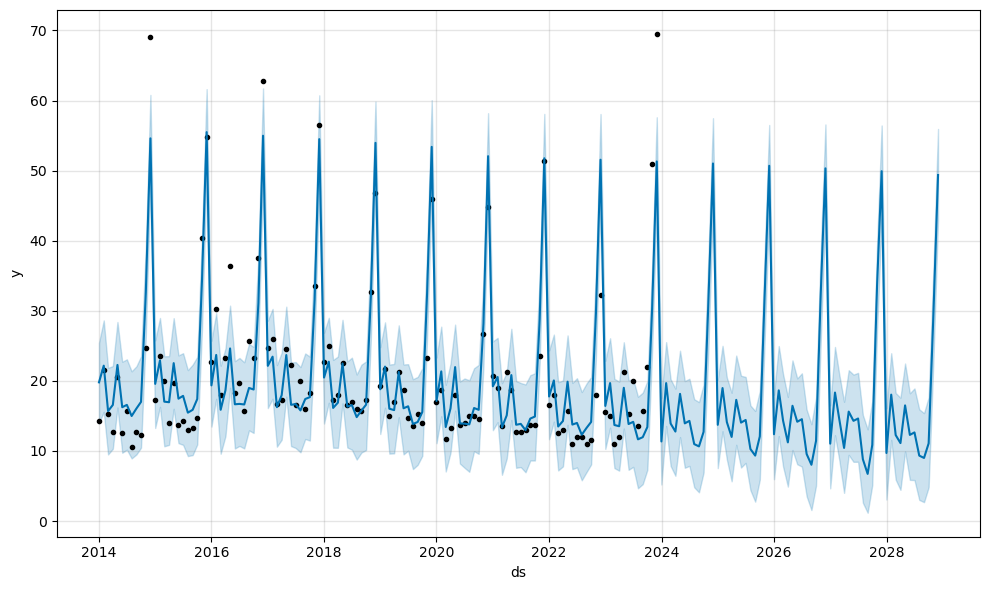

In [214]:
# forecast average search terms 
listy = [avg_searchterm_prophet_df]
searcheterms_forecast = df_forecast(listy)



for key, result in searcheterms_forecast.items():
    print(key) 
    # Display the forecast DataFrame
    display(result['dataframe'])
    # Display the plot
    fig = result['plot']
    display(fig)

In [215]:
list_of_stock_dfs

[       Month  Close PANDY
 0    2014-01    10.426917
 1    2014-02    12.607424
 2    2014-03    12.139128
 3    2014-04    12.575893
 4    2014-05    13.760471
 ..       ...          ...
 103  2022-08    14.674754
 104  2022-09    11.422354
 105  2022-10    12.853800
 106  2022-11    18.277714
 107  2022-12    17.148138
 
 [108 rows x 2 columns]]

In [263]:
# non logi
m = Prophet()

m.fit(running_shorts_df)

future = m.make_future_dataframe(periods=60, freq='M')

forecast = m.predict(future)

m.plot(forecast)

NameError: name 'running_shorts_df' is not defined

In [ ]:
# Use this if the model predicts values above 100 on google trends data

running_shorts_df['cap'] = 100
running_shorts_df['floor'] = 0

model = Prophet(growth='logistic')
model.fit(running_shorts_df)

future = model.make_future_dataframe(periods=100, freq='M')
future['cap'] = 100
future['floor'] = 0

forecast = model.predict(future)

display(forecast.tail(50))


In [ ]:
m.plot(forecast)

In [ ]:
# Call the Prophet function and store as an object
m = Prophet()
m


In [ ]:
m.fit(lulu_lemon_df)

In [ ]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 720 hours (30 days)
future = m.make_future_dataframe(periods=60, freq='M')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))

In [ ]:
forecast = m.predict(future)
display(forecast.head(10))

In [ ]:
m.plot(forecast)

In [ ]:
lulu_lemon_df.dropna()

In [ ]:

m = Prophet()
m.fit(lulu_df)

In [ ]:
future = m.make_future_dataframe(periods=500, freq='D')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))


In [ ]:
forecast = m.predict(future)
display(forecast.head(10))


In [ ]:
m.plot(forecast)